In [1]:
import pandas as pd
import geopandas as gpd 
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import warnings
import seaborn as sn
warnings.filterwarnings("ignore")

In [26]:
stenon_label = ['P','K','Mg','SOC','pH','MC','Texture']
soil_scanning_label = ['P','K','Mg','TOC','pH','MC','Clay']
stenon_cols_no_Texture = ['Stenon P', 'Stenon K', 'Stenon Mg', 'Stenon SOC', 'Stenon pH', 'Stenon MC','Stenon Nmin']
soil_scanning_cols = ['SS P','SS K','SS Mg','SS TOC','SS pH','SS MC','SS Clay']
all_cols = ['Stenon P','Stenon K','Stenon Mg','Stenon SOC','Stenon pH','Stenon MC','Stenon Texture','Stenon Nmin','SS P','SS K','SS Mg','SS TOC','SS pH','SS MC','SS Clay']
corr_cols = ['yield','MC mean','AWC mean','SS P', 'SS K', 'SS Mg', 'SS Ca', 'SS CEC', 'SS Clay','SS TOC', 'SS pH', 'SS MC', 'St Nmin', 'St P', 'St K', 'St Mg','St Texture', 'St SOC', 'St pH', 'St MC']

In [27]:
gdf = gpd.read_file('Yield_sampled.geojson')
old_crs = gdf.crs.to_epsg()
gdf = gdf.to_crs(5650)
new_crs = gdf.crs.to_epsg()
print("Yield_sampled.geojson from",old_crs,"to",new_crs)
gdf.keys()

Yield_sampled.geojson from 5650 to 5650


Index(['device_id', 'yield', 'variety', 'FC', 'PWP', 'NDVI_S2_22',
       'NDVI_S2_23', 'NDVI_UAV_23', 'NDRE_UAV_23', 'MZ_irr', 'MZ_fer',
       'fertility', 'SS P', 'SS K', 'SS Mg', 'SS Ca', 'SS CEC', 'SS Clay',
       'SS TOC', 'SS pH', 'SS MC', 'St Nmin', 'St P', 'St K', 'St Mg',
       'St Texture', 'St SOC', 'St pH', 'St MC', 'MC mean', 'AWC mean',
       'geometry'],
      dtype='object')

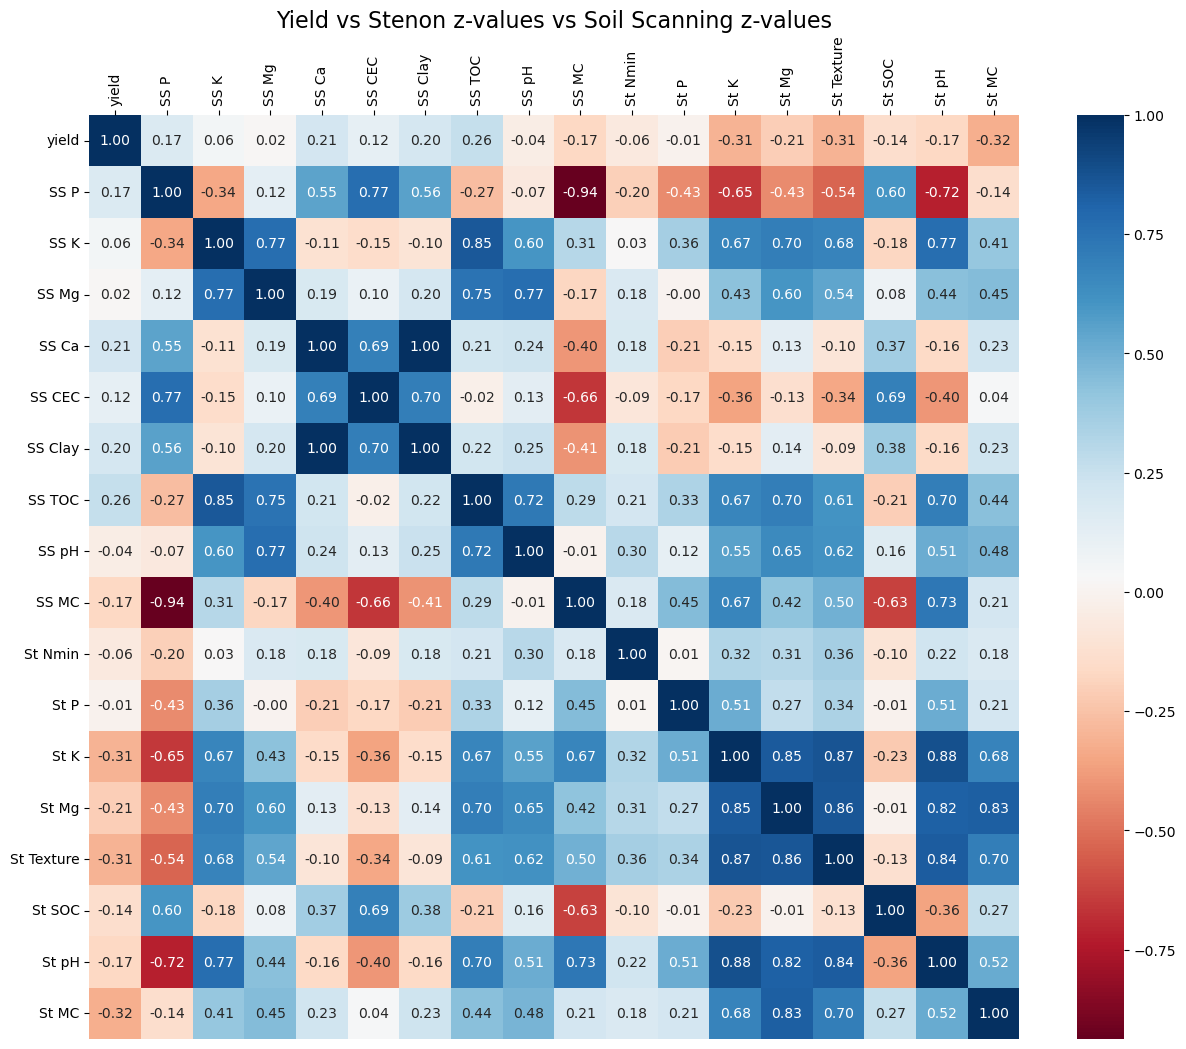

In [15]:
## Yield Correlation Matrix
plt.rcParams["figure.figsize"] = (15,(12))

corr_matrix = gdf[corr_cols].corr()
ax = sn.heatmap(corr_matrix, annot=True, cmap="RdBu", fmt=".2f")
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('Yield vs Stenon z-values vs Soil Scanning z-values', size=16)
plt.savefig('corr_matrix_Yield.png', bbox_inches='tight', dpi=400)

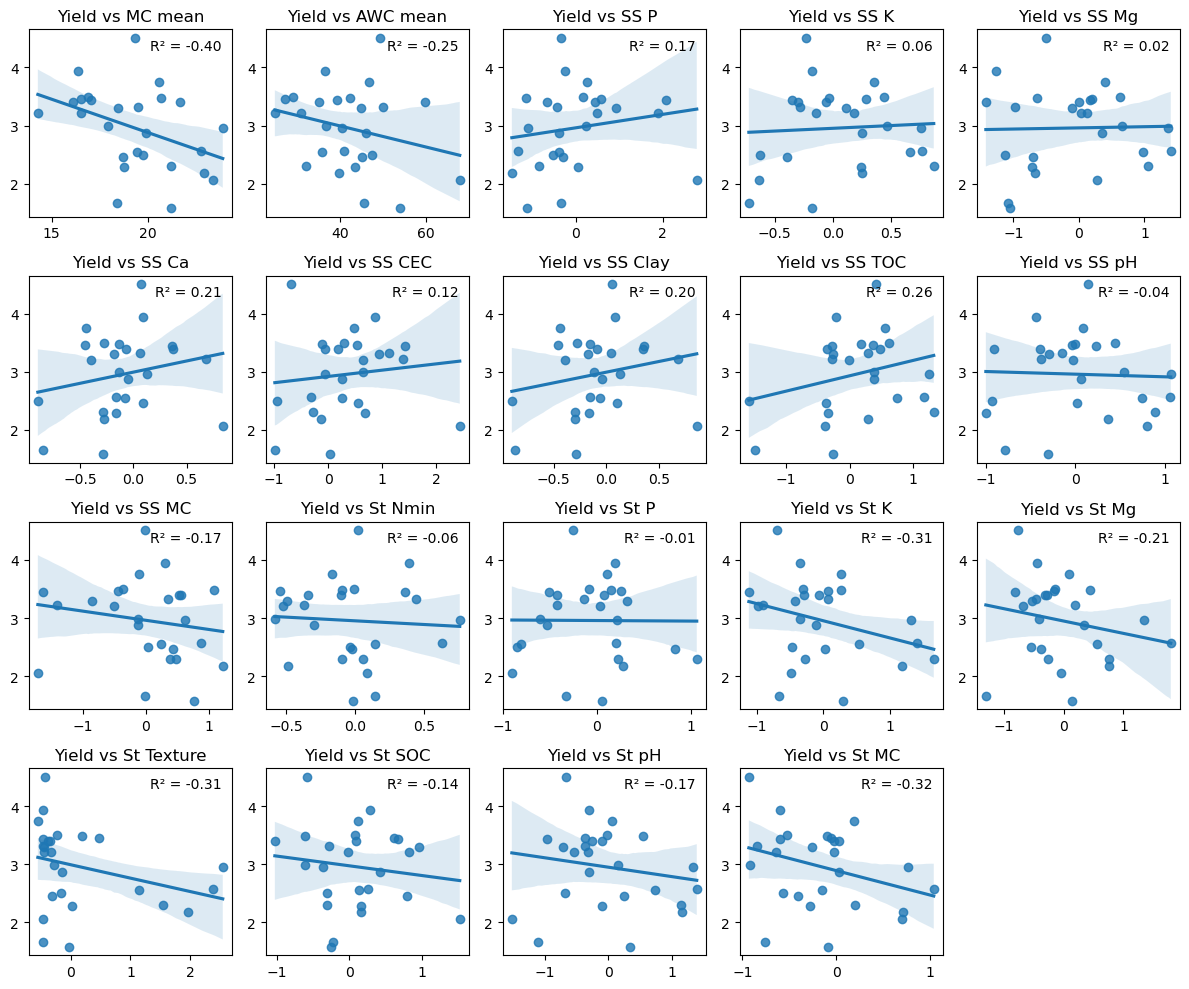

In [29]:
# Yield Regression Plots
df = gdf[corr_cols]

# Calculate the number of rows and columns needed
num_cols = len(df.columns) - 1  # Exclude the 'yield' column
num_rows = (num_cols - 1) // 5 + 1  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, 5, figsize=(12, 10))

# Flatten the axes array
axes = axes.flatten()

# Plot each scatter plot with regression line
for i, col in enumerate(df.columns[1:]):  # Exclude the 'yield' column
    sn.regplot(x=col, y='yield', data=df, ax=axes[i],scatter_kws={'alpha':0.8})
    axes[i].set_title('Yield vs ' + f'{col}')

    # Calculate the predicted values using the regression line
    x = df[col]
    y = df['yield']
    coef = np.polyfit(x, y, 1)
    poly1d_fn = np.poly1d(coef)
    predicted_values = poly1d_fn(x)
    
    # Calculate RMSD
    rmsd = np.sqrt(np.mean((predicted_values - y) ** 2))
    
    # Display RMSD in the plot
    #axes[i].text(0.95, 0.85, f'RMSD = {rmsd:.2f}', ha='right', va='top', transform=axes[i].transAxes)
    

    # add R as text
    r_value = df[['yield', col]].corr().iloc[0, 1]  # Calculate the correlation coefficient
    axes[i].text(0.95, 0.95, f'R² = {r_value:.2f}', ha='right', va='top', transform=axes[i].transAxes)

    axes[i].set_xlabel('', labelpad=-0.5)  # Adjust the labelpad for x-axis label
    axes[i].set_ylabel('', labelpad=-0.5)  # Adjust the labelpad for y-axis label


# Hide any unused subplots
for j in range(i + 1, num_rows * 5):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('plots/yield_regression_plots.png', bbox_inches='tight', dpi=400)
plt.show()